# Création d'une **rose des vents**

In [1]:
# Initialisation

## Importation des libraries, packages et modules nécessaires au fonctionnement de ce notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Définition des paramètres esthétiques généraux
%matplotlib inline
sns.set_theme(style = "whitegrid", palette = "bright")

## Importation du jeu de données et enregistrement dans le DataFrame `df`
df = pd.read_csv("../../data/raw/weatherAUS.csv")

In [2]:
# Préparation des données générales

df_wind_gust = df[["Location", "WindGustDir", "WindGustSpeed"]]
WindGustDir_directions_to_radians_dictionary = {
    "N": np.pi / 2,
    "E": 0.0,
    "S": 3 * np.pi,
    "W": np.pi,
    "NE": np.pi / 4,
    "SE": 7 * np.pi / 4,
    "SW": 5 * np.pi / 4,
    "NW": 3 * np.pi / 4,
    "NNE": 0.375 * np.pi,
    "ENE": 0.125 * np.pi,
    "ESE": 1.875 * np.pi,
    "SSE": 1.625 * np.pi,
    "SSW": 1.375 * np.pi,
    "WSW": 1.125 * np.pi,
    "WNW": 0.875 * np.pi,
    "NNW": 0.625 * np.pi
    }
wind_gust_speed_categories = ["0 - 20", "20 - 40", "40 - 60", "60 - 80", "80 - 100", "> 100"]

In [3]:
df.groupby("Location")["WindGustDir"].apply(lambda x: x.isna().sum())

Location
Adelaide              26
Albany              3040
Albury                32
AliceSprings          51
BadgerysCreek         76
Ballarat              31
Bendigo               41
Brisbane              41
Cairns                19
Canberra             339
Cobar                 42
CoffsHarbour         359
Dartmoor              69
Darwin                46
GoldCoast            120
Hobart                23
Katherine             29
Launceston            34
Melbourne             14
MelbourneAirport      15
Mildura                5
Moree                 78
MountGambier          53
MountGinini          319
Newcastle           3039
Nhil                  11
NorahHead             54
NorfolkIsland         45
Nuriootpa             49
PearceRAAF           145
Penrith               65
Perth                  5
PerthAirport          46
Portland              35
Richmond              57
Sale                 141
SalmonGums            84
Sydney              1038
SydneyAirport         51
Townsville      

In [4]:
df.groupby("Location")["WindGustSpeed"].apply(lambda x: x.isna().sum())

Location
Adelaide              26
Albany              3040
Albury                32
AliceSprings          51
BadgerysCreek         76
Ballarat              31
Bendigo               40
Brisbane              41
Cairns                18
Canberra             337
Cobar                 42
CoffsHarbour         359
Dartmoor              69
Darwin                42
GoldCoast            120
Hobart                23
Katherine             29
Launceston            33
Melbourne             14
MelbourneAirport      15
Mildura                5
Moree                 77
MountGambier          52
MountGinini          319
Newcastle           3039
Nhil                  11
NorahHead             54
NorfolkIsland         44
Nuriootpa             34
PearceRAAF           145
Penrith               65
Perth                  5
PerthAirport          46
Portland              35
Richmond              55
Sale                 141
SalmonGums            84
Sydney              1038
SydneyAirport         51
Townsville      

In [5]:
# Définition d'une fonction qui prend en argument le nom d'une station météorologique sous forme de chaîne de caractères et qui trace la rose des vents correspondante

def plot_wind_rose(location: str):

    ## Préparation des données spécifiques
    df_wind_gust_location = df_wind_gust[df_wind_gust["Location"] == location]
    df_wind_gust_location["WindGustDir"] = df_wind_gust_location["WindGustDir"].fillna(df_wind_gust_location["WindGustDir"].mode())
    df_wind_gust_location["WindGustSpeed"] = df_wind_gust_location["WindGustSpeed"].fillna(df_wind_gust_location["WindGustSpeed"].mean())
    df_wind_gust_location = df_wind_gust_location.replace(to_replace = WindGustDir_directions_to_radians_dictionary)
    wind_gust_speed_cut = pd.cut(x = df_wind_gust_location["WindGustSpeed"],
                                 bins = (0, 20, 40, 60, 80, 100, np.inf),
                                 labels = wind_gust_speed_categories)
    wind_gust_table = pd.crosstab((df_wind_gust_location["WindGustDir"]), wind_gust_speed_cut)
    N = 16
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint = False)
    width = np.pi / 8
    bottom = 0.0
    colors = ["#caf0f8", "#90e0ef", "#00b4d8", "#0077b6", "#03045e", "#000000"]

    ## Initialisation de la toile
    fig = plt.figure(figsize = (6 ,6))

    ## Traçage
    ax = plt.subplot(projection = "polar")
    for i in range(wind_gust_table.shape[1]): ### Itération sur les 6 colonnes (catégories de vent) de « wind_gust_table »
        radii = wind_gust_table.iloc[:, i] ### Colonne de « wind_gust_table » avec 16 lignes, chacune correspondant à la fréquence d'une direction du vent
        ax.bar(x = theta,
               height = radii,
               width = width,
               bottom = bottom,
               label = wind_gust_speed_categories[i] + " km / h",
               color = colors[i],
               alpha = 0.75) ### Traçage de la colonne
        bottom += radii ### Empilement de la colonne suivante

    ## Mise en forme
    lines, labels = plt.thetagrids(np.arange(0.0, 360, 22.5),
                                   ("E", "ENE", "NE", "NNE",
                                    "N", "NNW", "NW", "WNW",
                                    "W", "WSW", "SW", "SSW",
                                    "S", "SSE", "SE", "ESE"))
    ax.set_yticklabels([])
    plt.title("Les plus fortes rafales de vent à {}".format(location), fontweight = "bold", fontsize = 16)
    plt.legend(bbox_to_anchor=(1.25, 0), fontsize = 10);

/var/folders/dr/y62ysxxx6r9_rqfr8l68lm080000gn/T/ipykernel_79433/2471716905.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_gust_location["WindGustDir"] = df_wind_gust_location["WindGustDir"].fillna(df_wind_gust_location["WindGustDir"].mode())
/var/folders/dr/y62ysxxx6r9_rqfr8l68lm080000gn/T/ipykernel_79433/2471716905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_gust_location["WindGustSpeed"] = df_wind_gust_location["WindGustSpeed"].fillna(df_wind_gust_location["WindGustSpeed"].me

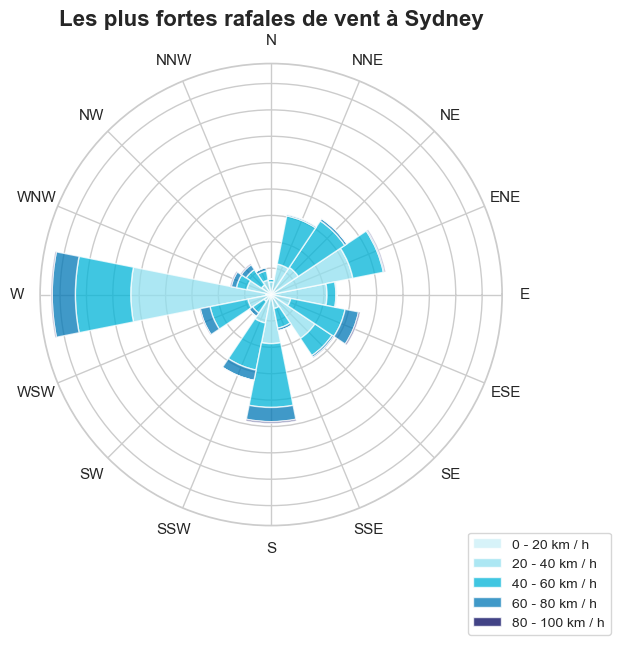

In [6]:
# Exécution de la fonction

plot_wind_rose("Sydney")